<a href="https://colab.research.google.com/github/alcideschaux/DKQ24-CDE/blob/main/DKQ24_CDE_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('DKQ24_CDE_DATA.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 27 columns):
 #   Column                                                                                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                                                                                             --------------  ----- 
 0   Edad                                                                                                                                                                               48 non-null     int64 
 1   Sexo                                                                                                                                                                               48 non-null     object
 2   Nivel educativo                                                 

In [2]:
df.head()

,Edad,Sexo,Nivel educativo,Conocimientos básicos sobre diabetes mellitus [¿El comer azúcar es causa de diabetes?],Conocimientos básicos sobre diabetes mellitus [¿La diabetes es causada por la falta de insulina?],Conocimientos básicos sobre diabetes mellitus [¿La diabetes es causada porque los riñones no expulsan la glucosa del cuerpo?],Conocimientos básicos sobre diabetes mellitus [¿Los riñones producen insulina?],Conocimientos básicos sobre diabetes mellitus [¿Siendo diabético puedo tener hijos diabéticos?],Conocimientos básicos sobre diabetes mellitus [¿La diabetes mellitus tiene cura?],Conocimientos básicos sobre diabetes mellitus [¿La diabetes se divide principalmente en tipo 1 y 2?],...,Conocimientos sobre el control glucémico [¿El medicamento es mas importante que la dieta y el ejercicio?],Conocimientos sobre el control glucémico [¿Son datos de hiperglucemia la sudoración y la sensación de frio?],Conocimientos sobre el control glucémico [¿Son datos de hipoglucemia la presencia de polidipsia (sed) y polifagia (mucho apetito)?],Conocimientos sobre la prevención y detección de complicaciones [¿La diabetes mellitus causa problemas de circulación sanguínea?],Conocimientos sobre la prevención y detección de complicaciones [¿Las heridas en los pacientes diabéticos cicatrizan más lento?],Conocimientos sobre la prevención y detección de complicaciones [¿El paciente diabético debe de tener más cuidado en el cortado de sus uñas?],"Conocimientos sobre la prevención y detección de complicaciones [¿La diabetes mellitus produce alteraciones en la percepción sensitiva (dolor en la cara, cuerpo, extremidades)?]",Conocimientos sobre la prevención y detección de complicaciones [¿Los pacientes diabéticos hacen infartos cerebrales con frecuencia?],Conocimientos sobre la prevención y detección de complicaciones [¿El diabético debe tener cuidado con su piel?],Conocimientos sobre la prevención y detección de complicaciones [¿El pie diabético hace infecciones frecuentes?]
0,60,Femenino,Primaria,No,Sí,No,No,Sí,No,Sí,...,No,Sí,No,Sí,Sí,Sí,Sí,Sí,Sí,Sí
1,64,Femenino,Terciaria,Sí,Sí,Sí,Sí,Sí,No,Sí,...,No,No sé,No sé,Sí,Sí,Sí,Sí,Sí,Sí,Sí
2,47,Femenino,Primaria,Sí,No sé,Sí,No sé,Sí,Sí,No sé,...,No,Sí,Sí,Sí,Sí,Sí,No sé,No sé,Sí,No sé
3,62,Femenino,Secundaria,Sí,No sé,No sé,No sé,No sé,Sí,No sé,...,No sé,No sé,Sí,No sé,Sí,Sí,No sé,No sé,Sí,No sé
4,70,Masculino,Primaria,No,Sí,Sí,No sé,No,No sé,Sí,...,No,Sí,No sé,Sí,Sí,Sí,No sé,No,Sí,No sé


In [3]:
# Convertir nivel educativo a una categoría ordenada, con el orden Primaria, Secundaria, Terciaria

from pandas.api.types import CategoricalDtype

orden_nivel = CategoricalDtype(['Primaria', 'Secundaria', 'Terciaria'], ordered=True)
df['Nivel educativo'] = df['Nivel educativo'].astype(orden_nivel)

# Estadística descriptiva


## Edad (años)

count    48.000000
mean     61.604167
std      11.547754
min      33.000000
25%      56.500000
50%      64.000000
75%      68.250000
max      85.000000
Name: Edad, dtype: float64


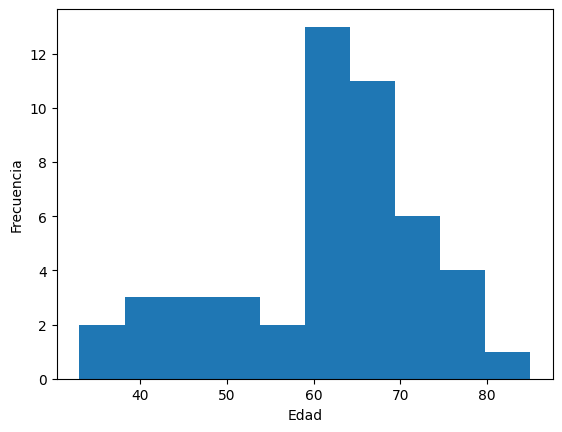

In [4]:
# Descripción
print(df['Edad'].describe())

# Gráfico
plt.hist(df['Edad'])
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

## Sexo

Sexo
Femenino     35
Masculino    13
Name: count, dtype: int64


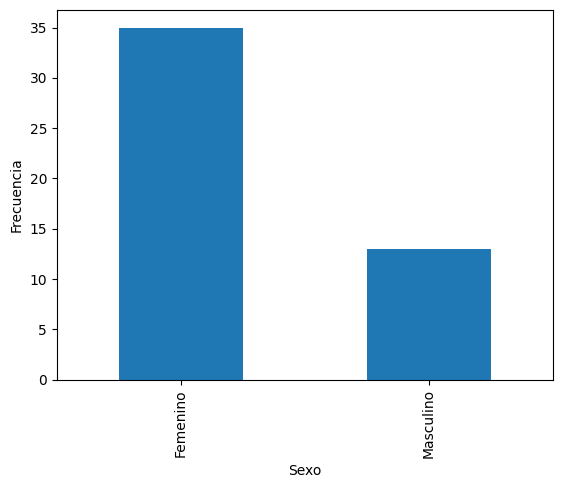

In [5]:
# Descripción
print(df['Sexo'].value_counts())

# Gráfico
df['Sexo'].value_counts().plot(kind='bar')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.show()

## Nivel educativo

Nivel educativo
Primaria      37
Secundaria     8
Terciaria      3
Name: count, dtype: int64


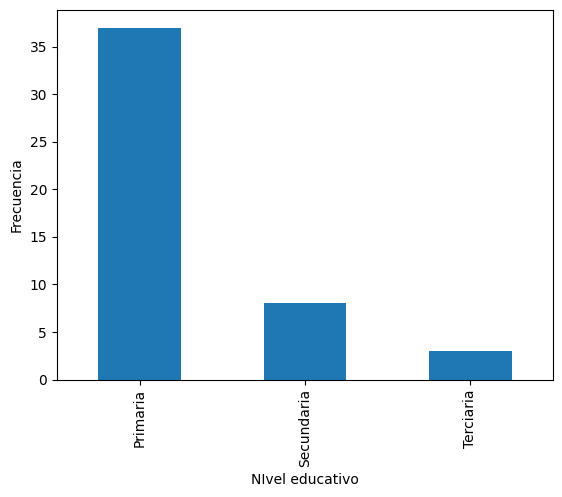

In [6]:
# Descripción
print(df['Nivel educativo'].value_counts())

# Gráfico
df['Nivel educativo'].value_counts().plot(kind='bar')
plt.xlabel('NIvel educativo')
plt.ylabel('Frecuencia')
plt.show()

# Cuestionario DKQ24

In [7]:
# Función para imprimir value_counts, graficar y titular con el nombre de la columna
def plot_column_bar(dataframe, column_index):
  """
  Imprime value_counts, crea un gráfico de barras y usa el nombre de la columna como título.

  Args:
    dataframe: El DataFrame de pandas.
    column_index: El índice entero de la columna a analizar.
  """
  # Obtener el nombre de la columna usando iloc
  column_name = dataframe.columns[column_index]

  # Obtener value_counts para la columna usando iloc
  value_counts = dataframe.iloc[:, column_index].value_counts(sort=False)

  # Imprimir value_counts
  # print(f"Pregunta: '{column_name}':")
  print(value_counts)

  # Crear el gráfico de barras
  plt.figure(figsize=(8, 6)) # Tamaño opcional de la figura
  value_counts.plot(kind='bar')

  # Configurar etiquetas y título
  # plt.xlabel(column_name) # Usar el nombre de la columna para la etiqueta del eje x
  plt.xlabel('')
  plt.ylabel('Frecuencia')
  # plt.title(f'Distribución de {column_name}') # Usar el nombre de la columna para el título

  # Mostrar el gráfico
  plt.show()

## Conocimientos básicos sobre diabetes mellitus (10 preguntas)

Conocimientos básicos sobre diabetes mellitus [¿El comer azúcar es causa de diabetes?]
No        5
Sí       38
No sé     5
Name: count, dtype: int64


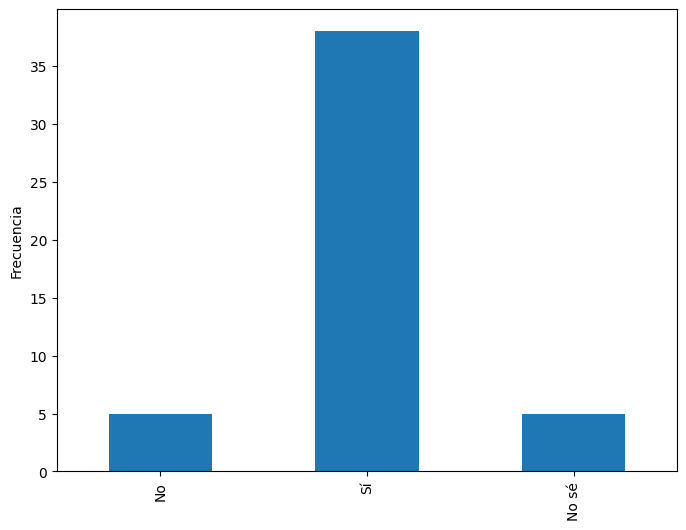

In [8]:
plot_column_bar(df, 3)

Conocimientos básicos sobre diabetes mellitus [¿La diabetes es causada por la falta de insulina?]
Sí       20
No sé    22
No        6
Name: count, dtype: int64


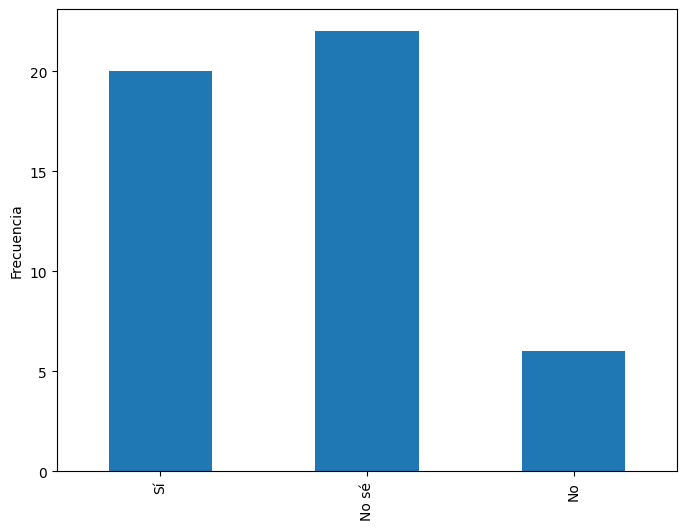

In [9]:
plot_column_bar(df, 4)

Conocimientos básicos sobre diabetes mellitus [¿La diabetes es causada porque los riñones no expulsan la glucosa del cuerpo?]
No        9
Sí       22
No sé    17
Name: count, dtype: int64


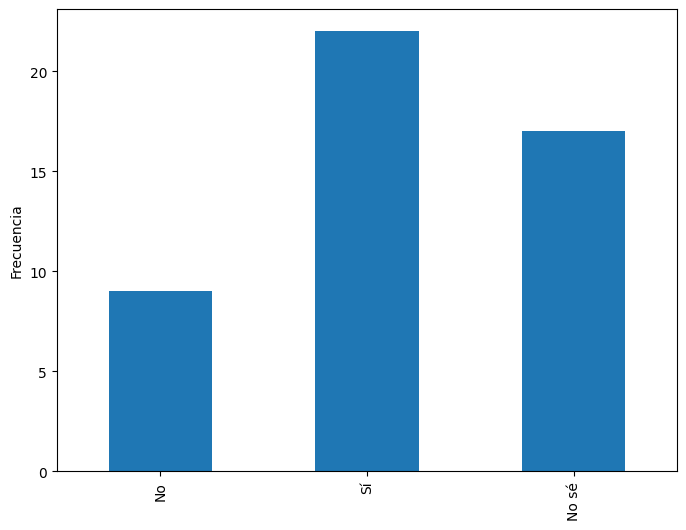

In [10]:
plot_column_bar(df, 5)

Conocimientos básicos sobre diabetes mellitus [¿Los riñones producen insulina?]
No        8
Sí        7
No sé    33
Name: count, dtype: int64


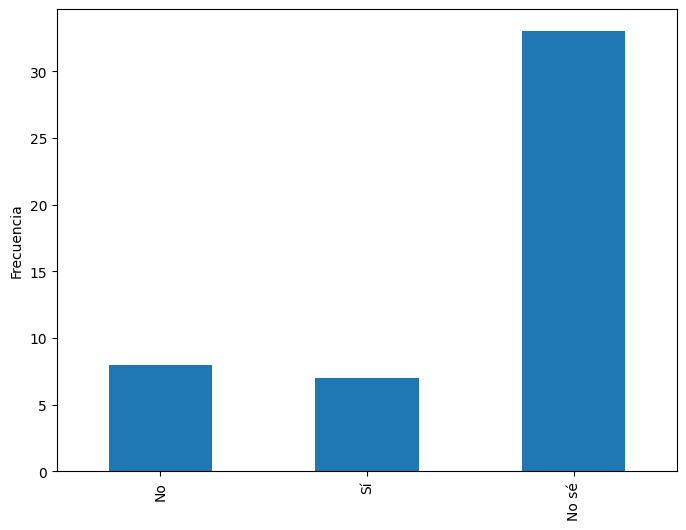

In [11]:
plot_column_bar(df, 6)

Conocimientos básicos sobre diabetes mellitus [¿Siendo diabético puedo tener hijos diabéticos?]
Sí       36
No sé     8
No        4
Name: count, dtype: int64


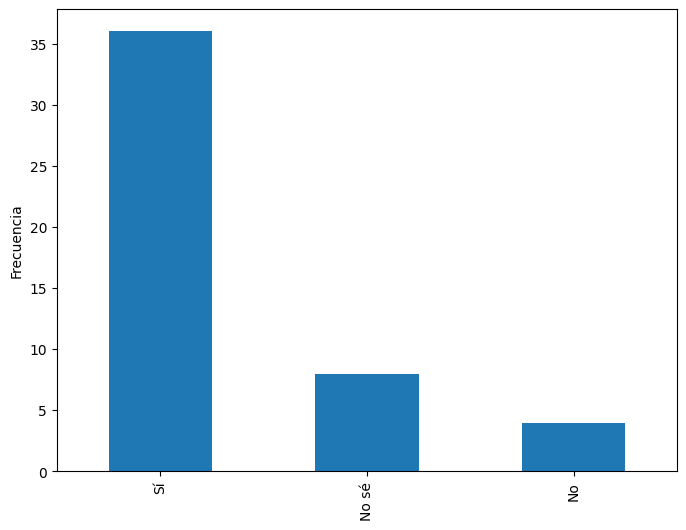

In [12]:
plot_column_bar(df, 7)

Conocimientos básicos sobre diabetes mellitus [¿La diabetes mellitus tiene cura?]
No       24
Sí       22
No sé     2
Name: count, dtype: int64


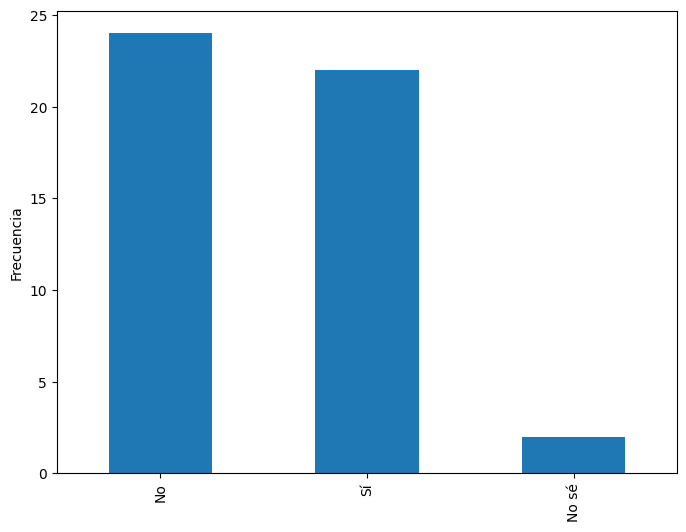

In [13]:
plot_column_bar(df, 8)

Conocimientos básicos sobre diabetes mellitus [¿La diabetes se divide principalmente en tipo 1 y 2?]
Sí       32
No sé    14
No        2
Name: count, dtype: int64


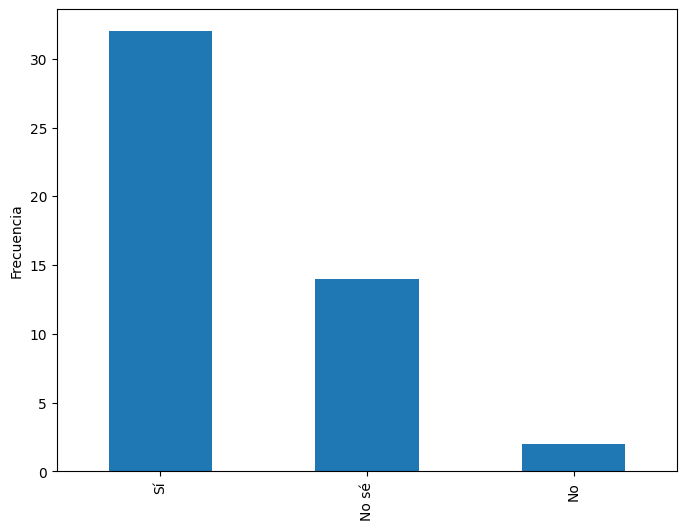

In [14]:
plot_column_bar(df, 9)

Conocimientos básicos sobre diabetes mellitus [¿Comer mucho estimula a producir insulina?]
Sí       27
No sé    19
No        2
Name: count, dtype: int64


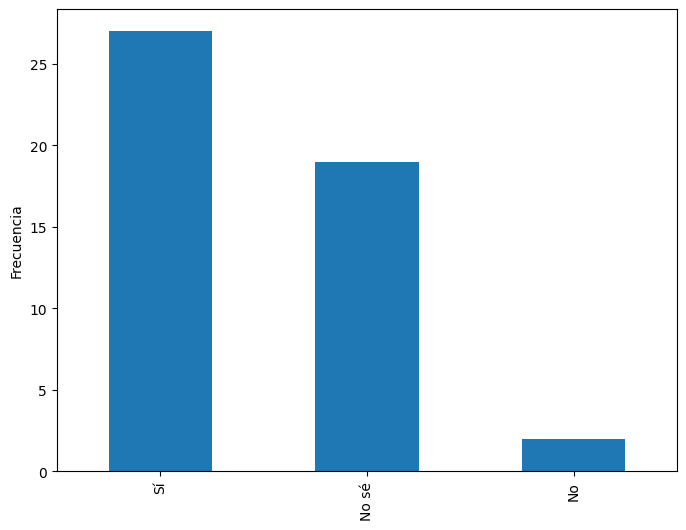

In [15]:
plot_column_bar(df, 10)

Conocimientos básicos sobre diabetes mellitus [¿Es igual de importante el escoger los alimentos a ingerir que la forma de prepararlos?]
Sí       43
No        2
No sé     3
Name: count, dtype: int64


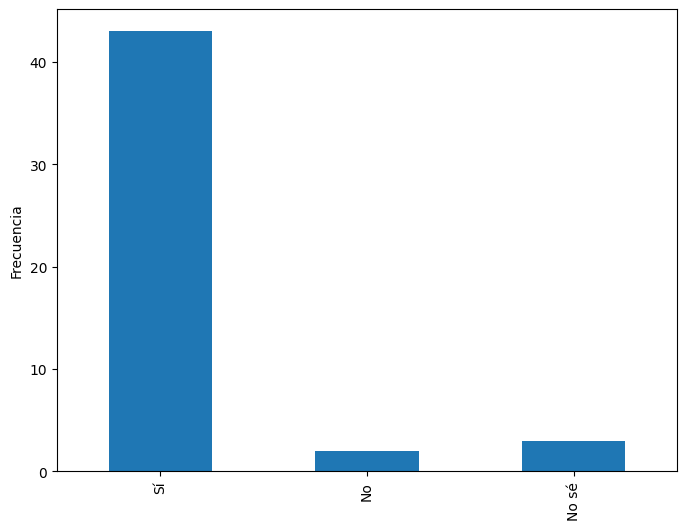

In [16]:
plot_column_bar(df, 11)

Conocimientos básicos sobre diabetes mellitus [¿Los alimentos de los diabéticos deben de ser diferentes a los de los demás?]
Sí    42
No     6
Name: count, dtype: int64


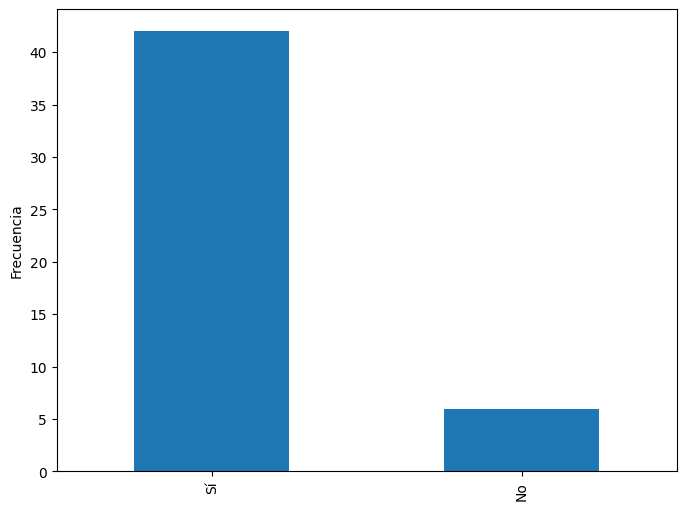

In [17]:
plot_column_bar(df, 12)

## Conocimientos sobre el control glucémico (7 preguntas)

Conocimientos sobre el control glucémico [¿A aquel diabético sin dieta, ejercicio y tratamiento médico le aumenta la glucemia?]
Sí       43
No        1
No sé     4
Name: count, dtype: int64


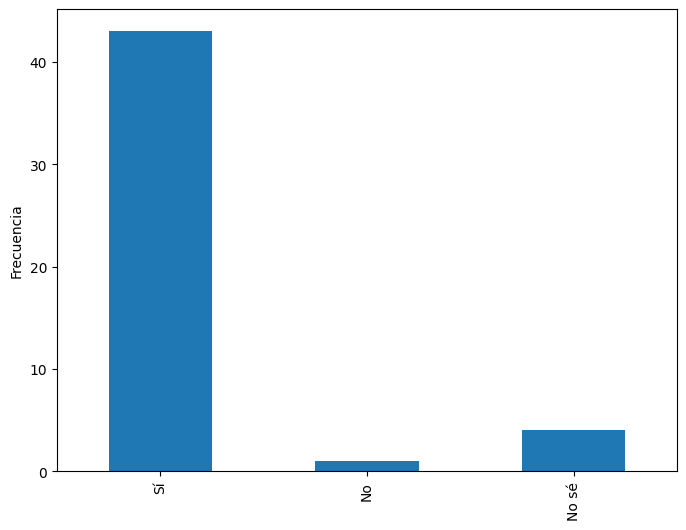

In [18]:
plot_column_bar(df, 13)

Conocimientos sobre el control glucémico [Identificación de nivel alto de glucemia en valores de 210 mg/dl]
Sí       23
No sé    20
No        5
Name: count, dtype: int64


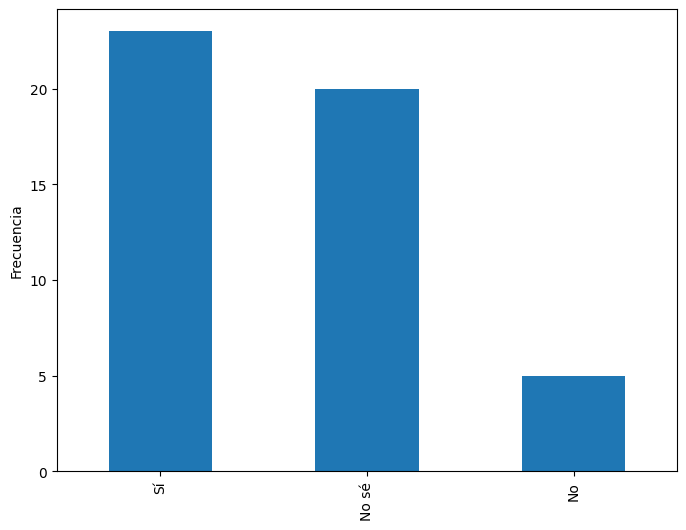

In [19]:
plot_column_bar(df, 14)

Conocimientos sobre el control glucémico [¿Es la mejor prueba para valorar la glucemia la realización de glucosurias (orina)?]
No       13
Sí       22
No sé    13
Name: count, dtype: int64


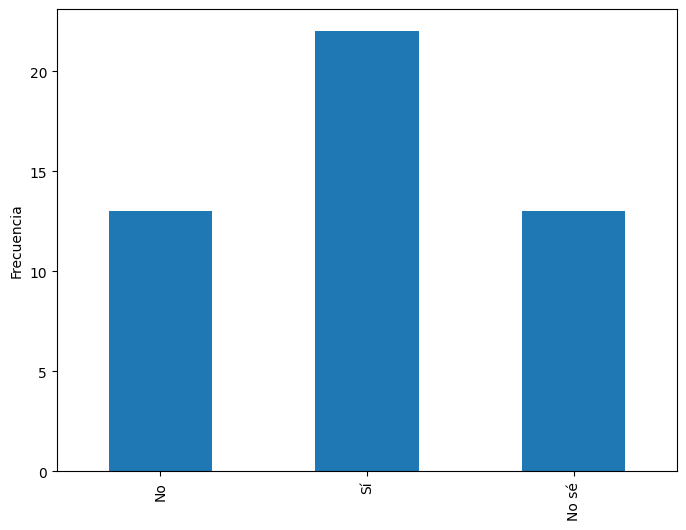

In [20]:
plot_column_bar(df, 15)

Conocimientos sobre el control glucémico [¿El ejercicio produce mayor necesidad de insulina o medicamentos?]
Sí       13
No        7
No sé    28
Name: count, dtype: int64


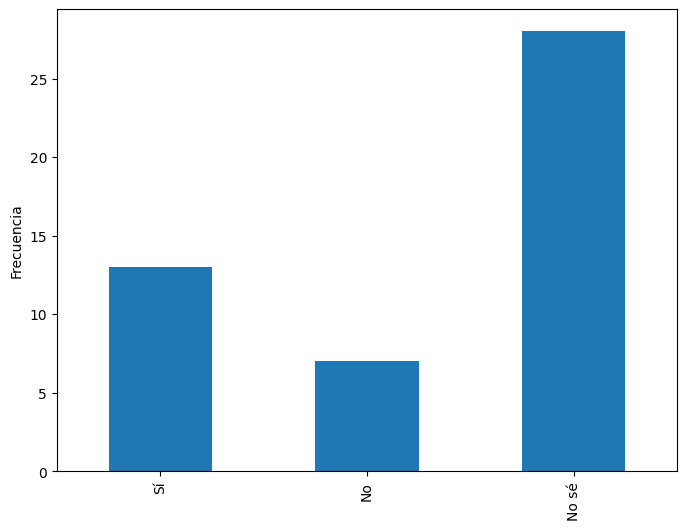

In [21]:
plot_column_bar(df, 16)

Conocimientos sobre el control glucémico [¿El medicamento es mas importante que la dieta y el ejercicio?]
No       33
No sé     4
Sí       11
Name: count, dtype: int64


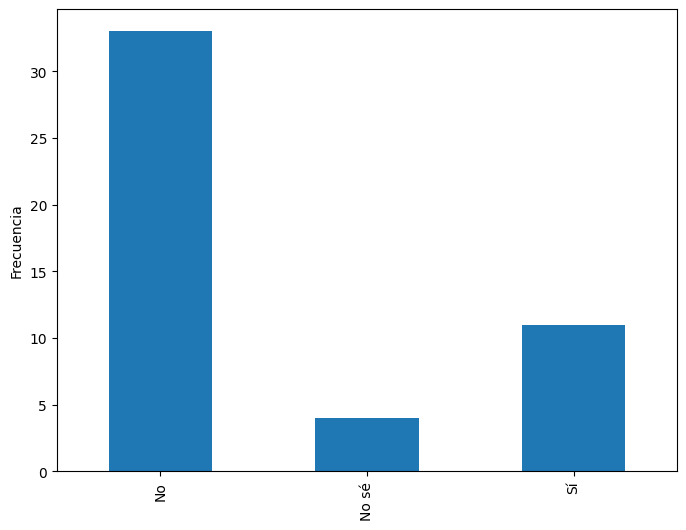

In [22]:
plot_column_bar(df, 17)

Conocimientos sobre el control glucémico [¿Son datos de hiperglucemia la sudoración y la sensación de frio?]
Sí       27
No sé    18
No        3
Name: count, dtype: int64


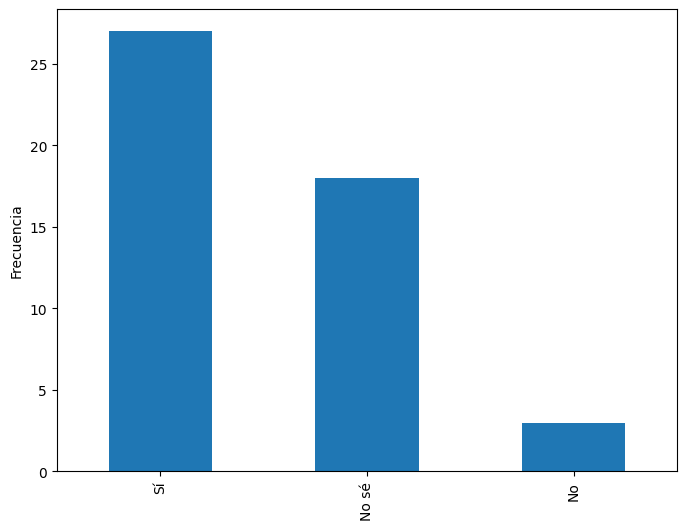

In [23]:
plot_column_bar(df, 18)

Conocimientos sobre el control glucémico [¿Son datos de hipoglucemia la presencia de polidipsia (sed) y polifagia (mucho apetito)?]
No        4
No sé    16
Sí       28
Name: count, dtype: int64


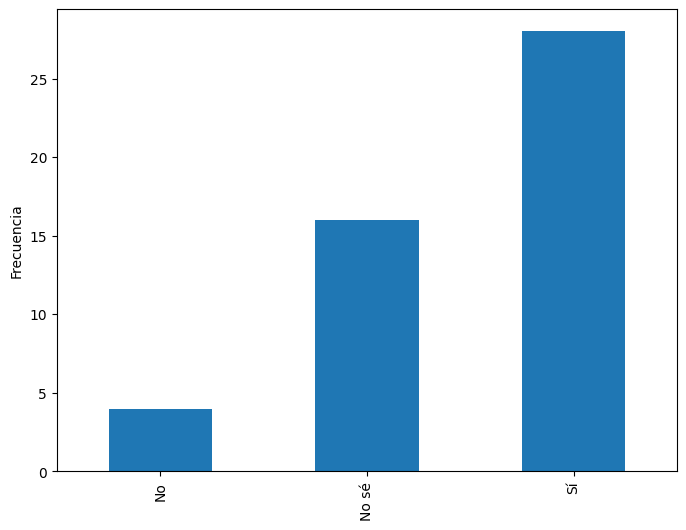

In [24]:
plot_column_bar(df, 19)

## Conocimientos sobre la prevención y detección de complicaciones (7 preguntas)

Conocimientos sobre la prevención y detección de complicaciones [¿La diabetes mellitus causa problemas de circulación sanguínea?]
Sí       40
No sé     8
Name: count, dtype: int64


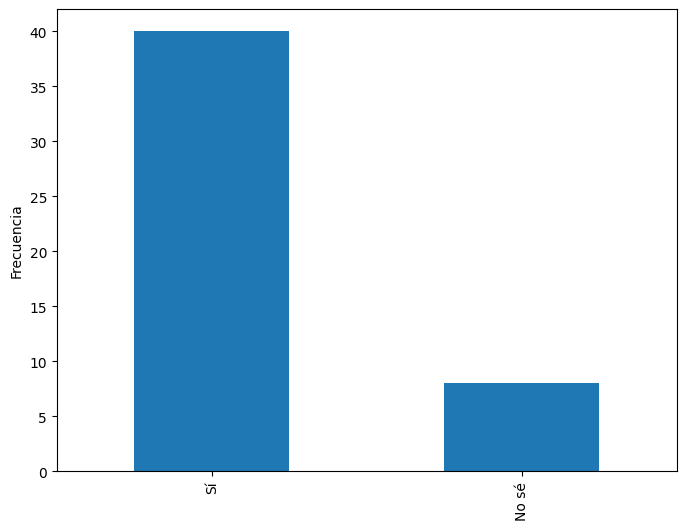

In [25]:
plot_column_bar(df, 20)

Conocimientos sobre la prevención y detección de complicaciones [¿Las heridas en los pacientes diabéticos cicatrizan más lento?]
Sí       41
No sé     2
No        5
Name: count, dtype: int64


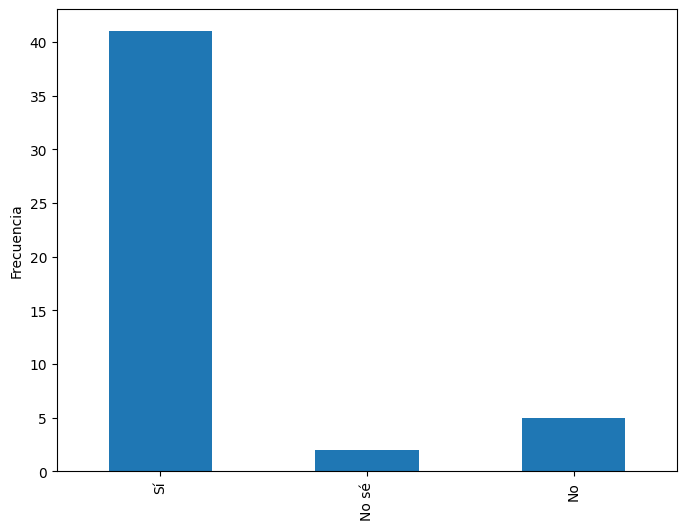

In [26]:
plot_column_bar(df, 21)

Conocimientos sobre la prevención y detección de complicaciones [¿El paciente diabético debe de tener más cuidado en el cortado de sus uñas?]
Sí       44
No        2
No sé     2
Name: count, dtype: int64


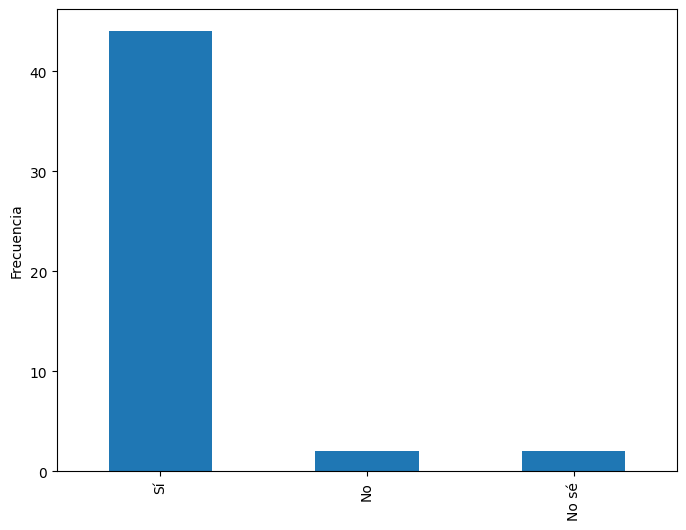

In [27]:
plot_column_bar(df, 22)

Conocimientos sobre la prevención y detección de complicaciones [¿La diabetes mellitus produce alteraciones en la percepción sensitiva (dolor en la cara, cuerpo, extremidades)?]
Sí       33
No sé     8
No        7
Name: count, dtype: int64


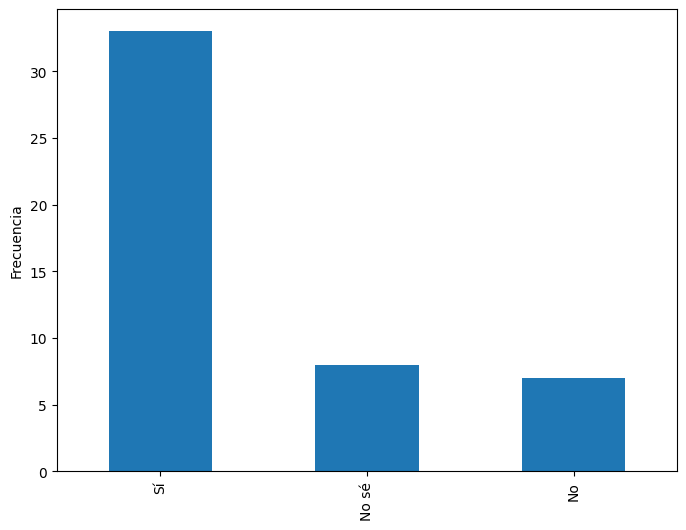

In [28]:
plot_column_bar(df, 23)

Conocimientos sobre la prevención y detección de complicaciones [¿Los pacientes diabéticos hacen infartos cerebrales con frecuencia?]
Sí       39
No sé     8
No        1
Name: count, dtype: int64


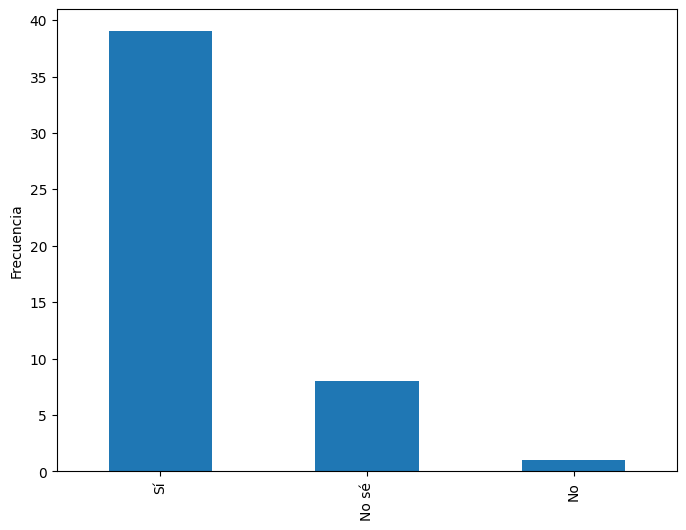

In [29]:
plot_column_bar(df, 24)

Conocimientos sobre la prevención y detección de complicaciones [¿El diabético debe tener cuidado con su piel?]
Sí       46
No sé     2
Name: count, dtype: int64


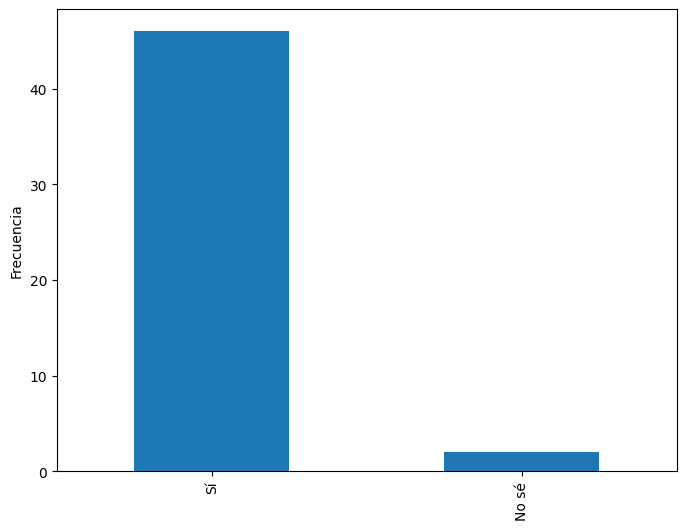

In [30]:
plot_column_bar(df, 25)

Conocimientos sobre la prevención y detección de complicaciones [¿El pie diabético hace infecciones frecuentes?]
Sí       38
No sé     8
No        2
Name: count, dtype: int64


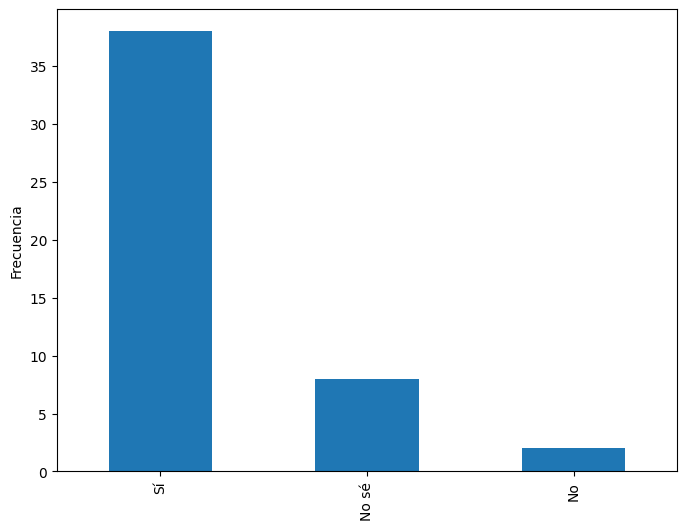

In [31]:
plot_column_bar(df, 26)

In [32]:
# Función para calcular el porcentaje de respuestas correctas del cuestionario DKQ24

def calculate_correct_percentage(dataframe, column_start_index, column_end_index, correct_answers, df_correct_answers):
  """
  Calcula el porcentaje de respuestas correctas para un rango de columnas
  basado en una lista de respuestas correctas.

  Args:
    dataframe: El DataFrame de pandas.
    column_start_index: El índice entero de la primera columna del rango.
    column_end_index: El índice entero de la última columna del rango.
    correct_answers: Una lista de las respuestas correctas, donde el orden corresponde a las columnas en el rango.
    df_correct_answers: El nombre de la base de datos con el porcentaje de respuestas correctas.

  Returns:
    Un DataFrame con el porcentaje de respuestas correctas para cada fila (individuo).
  """
  # Seleccionar las columnas relevantes
  answer_columns = dataframe.iloc[:, column_start_index : column_end_index + 1]

  # Convertir la lista de respuestas correctas a una Serie de pandas para facilitar la comparación
  correct_answers_series = pd.Series(correct_answers, index=answer_columns.columns)

  # Comparar las respuestas de cada individuo con las respuestas correctas
  # Esto resultará en un DataFrame de booleanos (True si la respuesta es correcta, False si no)
  correct_responses = answer_columns.eq(correct_answers_series, axis=1)

  # Calcular el número de respuestas correctas por fila (individuo)
  num_correct = correct_responses.sum(axis=1)

  # Calcular el número total de preguntas en el rango
  total_questions = len(correct_answers)

  # Calcular el porcentaje de respuestas correctas
  percentage_correct = (num_correct / total_questions) * 100

  # Crear un nuevo DataFrame para almacenar los porcentajes
  result_df = pd.DataFrame({df_correct_answers: percentage_correct})

  return result_df

In [33]:
# Respuestas correctas para el cuestionario DKQ-24

# Lista 1: Conocimientos básicos sobre diabetes mellitus (preguntas 1-10)
conocimientos_basicos = [
    "No",  # 1. ¿El comer azúcar es causa de diabetes?
    "Sí",  # 2. ¿La diabetes es causada por la falta de insulina?
    "No",  # 3. ¿La diabetes es causada porque los riñones no expulsan la glucosa del cuerpo?
    "No",  # 4. ¿Los riñones producen insulina?
    "Sí",  # 5. ¿Siendo diabético puedo tener hijos diabéticos?
    "No",  # 6. ¿La diabetes mellitus tiene cura?
    "Sí",  # 7. ¿La diabetes se divide principalmente en tipo 1 y 2?
    "Sí",  # 8. ¿Comer mucho estimula a producir insulina?
    "Sí",  # 9. ¿Es igual de importante el escoger los alimentos a ingerir que la forma de prepararlos?
    "No"   # 10. ¿Los alimentos de los diabéticos deben de ser diferentes a los de los demás?
]

# Lista 2: Conocimientos sobre el control glucémico (preguntas 11-17)
control_glucemico = [
    "Sí",  # 11. ¿A aquel diabético sin dieta, ejercicio y tratamiento médico le aumenta la glucemia?
    "Sí",  # 12. Identificación de nivel alto de glucemia en valores de 210 mg/dl
    "No",  # 13. ¿Es la mejor prueba para valorar la glucemia la realización de glucosurias (orina)?
    "No",  # 14. ¿El ejercicio produce mayor necesidad de insulina o medicamentos?
    "No",  # 15. ¿El medicamento es más importante que la dieta y el ejercicio?
    "No",  # 16. ¿Son datos de hiperglucemia la sudoración y la sensación de frío?
    "No"   # 17. ¿Son datos de hipoglucemia la presencia de polidipsia (sed) y polifagia (mucho apetito)?
]

# Lista 3: Conocimientos sobre la prevención y detección de complicaciones (preguntas 18-24)
prevencion_complicaciones = [
    "Sí",  # 18. ¿La diabetes mellitus causa problemas de circulación sanguínea?
    "Sí",  # 19. ¿Las heridas en los pacientes diabéticos cicatrizan más lento?
    "Sí",  # 20. ¿El paciente diabético debe de tener más cuidado en el cortado de sus uñas?
    "Sí",  # 21. ¿La diabetes mellitus produce alteraciones en la percepción sensitiva?
    "Sí",  # 22. ¿Los pacientes diabéticos hacen infartos cerebrales con frecuencia?
    "Sí",  # 23. ¿El diabético debe tener cuidado con su piel?
    "Sí"   # 24. ¿El pie diabético hace infecciones frecuentes?
]

# Lista 4: Todas las respuestas correctas (preguntas 1-24)
todas_respuestas = conocimientos_basicos + control_glucemico + prevencion_complicaciones

In [34]:
# Cálculo de los porcentajes de respuestas correctas

# Conocimientos básicos: Porcentaje de respuestas correctas (columnas 3 a 12)
conocimientos_basicos_df = calculate_correct_percentage(df, 3, 12, conocimientos_basicos, 'conocimientos_basicos_correctos')

# Control glucémico: Porcentaje de respuestas correctas (columnas 13 a 19)
control_glucemico_df = calculate_correct_percentage(df, 13, 19, control_glucemico, 'control_glucemico_correctos')

# Prevención de complicaciones: Porcentaje de respuestas correctas (columnas 20 a 26)
prevencion_complicaciones_df = calculate_correct_percentage(df, 20, 26, prevencion_complicaciones, 'prevencion_complicaciones_correctos')

# Cuestionario completo: Porcentaje de respuestas correctas (columnas 3 a 26)
todas_respuestas_df = calculate_correct_percentage(df, 3, 26, todas_respuestas, 'todas_respuestas_correctos')

In [35]:
# Concatenando las respuestas correctas por dimensión y totales con el conjunto de datos para análisis asociativos
df = pd.concat([df, conocimientos_basicos_df, control_glucemico_df, prevencion_complicaciones_df, todas_respuestas_df], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 31 columns):
 #   Column                                                                                                                                                                             Non-Null Count  Dtype   
---  ------                                                                                                                                                                             --------------  -----   
 0   Edad                                                                                                                                                                               48 non-null     int64   
 1   Sexo                                                                                                                                                                               48 non-null     object  
 2   Nivel educativo                                         

# Análisis asociativo

## Edad y nivel de conocimiento

Estadística descriptiva de Edad y Porcentajes de Respuestas Correctas:
            Edad  conocimientos_basicos_correctos  \
count  48.000000                        48.000000   
mean   61.604167                        43.750000   
std    11.547754                        18.864015   
min    33.000000                         0.000000   
25%    56.500000                        30.000000   
50%    64.000000                        40.000000   
75%    68.250000                        60.000000   
max    85.000000                        90.000000   

       control_glucemico_correctos  prevencion_complicaciones_correctos  \
count                    48.000000                            48.000000   
mean                     37.500000                            83.630952   
std                      17.589175                            22.441042   
min                       0.000000                             0.000000   
25%                      28.571429                            71.428571   
5

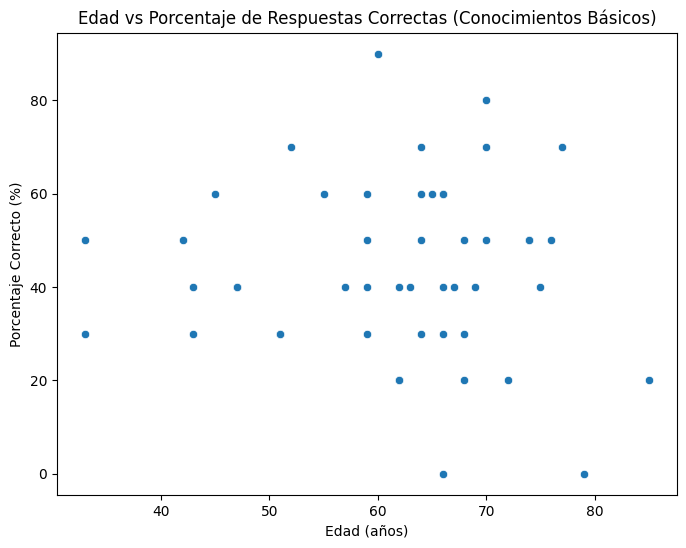

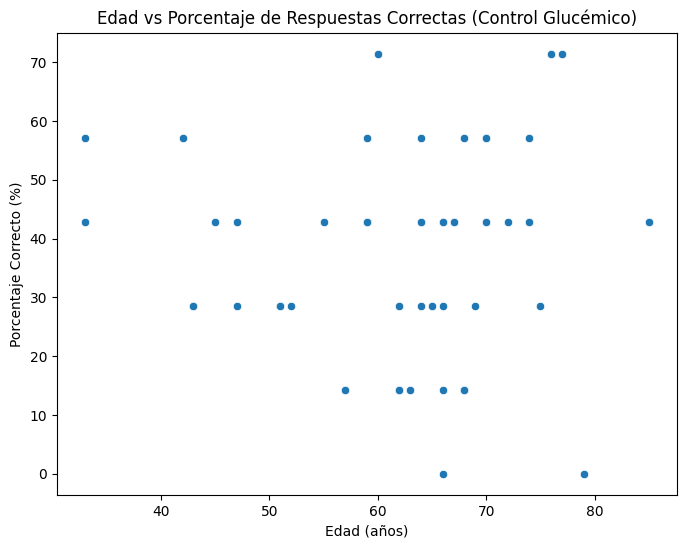

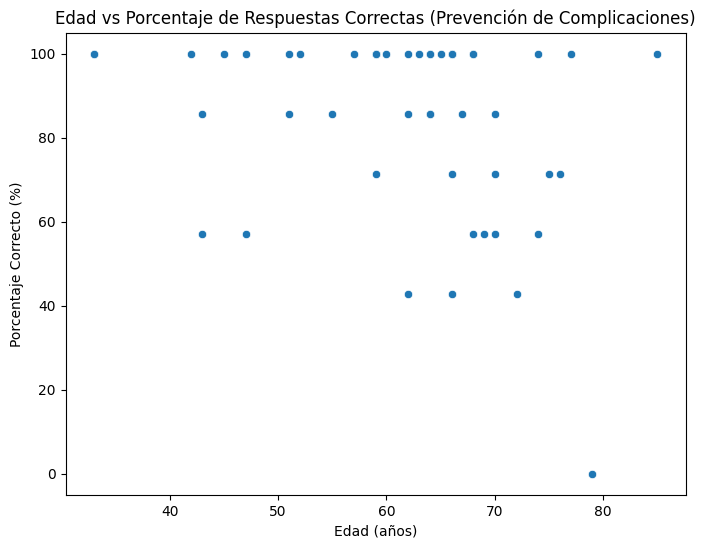

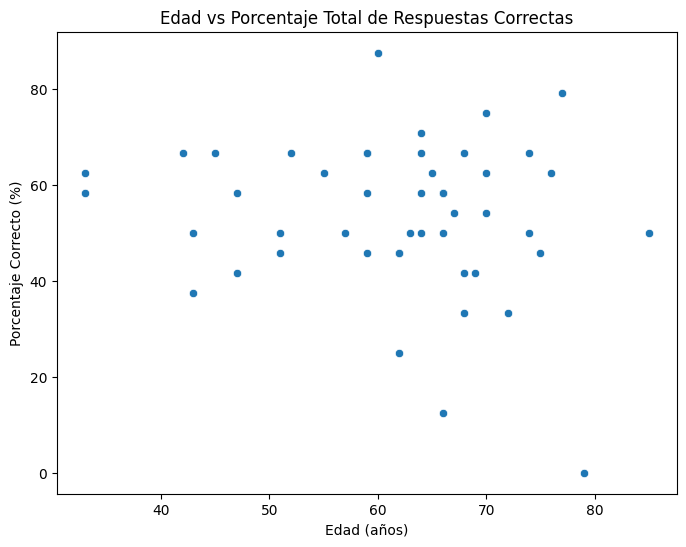

In [36]:
# Comparar edad con porcentajes de respuestas correctas (4 puntajes), descriptiva, prueba estadística, gráfico

from scipy import stats

# Descriptiva de la edad y los porcentajes de respuestas correctas
print("Estadística descriptiva de Edad y Porcentajes de Respuestas Correctas:")
print(df[['Edad', 'conocimientos_basicos_correctos', 'control_glucemico_correctos', 'prevencion_complicaciones_correctos', 'todas_respuestas_correctos']].describe())

# Prueba estadística: Correlación de Pearson entre Edad y cada porcentaje de respuestas correctas
print("\nPrueba de Correlación de Pearson entre Edad y Porcentajes de Respuestas Correctas:")

# Correlación entre Edad y Conocimientos Básicos
correlation_basicos, p_value_basicos = stats.pearsonr(df['Edad'], df['conocimientos_basicos_correctos'])
print(f"Edad vs Conocimientos Básicos Correctos: Correlación = {correlation_basicos:.3f}, P-valor = {p_value_basicos:.3f}")

# Correlación entre Edad y Control Glucémico
correlation_control, p_value_control = stats.pearsonr(df['Edad'], df['control_glucemico_correctos'])
print(f"Edad vs Control Glucémico Correctos: Correlación = {correlation_control:.3f}, P-valor = {p_value_control:.3f}")

# Correlación entre Edad y Prevención de Complicaciones
correlation_prevencion, p_value_prevencion = stats.pearsonr(df['Edad'], df['prevencion_complicaciones_correctos'])
print(f"Edad vs Prevención de Complicaciones Correctos: Correlación = {correlation_prevencion:.3f}, P-valor = {p_value_prevencion:.3f}")

# Correlación entre Edad y Todas las Respuestas
correlation_todas, p_value_todas = stats.pearsonr(df['Edad'], df['todas_respuestas_correctos'])
print(f"Edad vs Todas las Respuestas Correctas: Correlación = {correlation_todas:.3f}, P-valor = {p_value_todas:.3f}")

# Gráficos de dispersión
print("\nGráficos de Dispersión de Edad vs Porcentajes de Respuestas Correctas:")

# Gráfico de dispersión para Conocimientos Básicos
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Edad', y='conocimientos_basicos_correctos')
plt.title('Edad vs Porcentaje de Respuestas Correctas (Conocimientos Básicos)')
plt.xlabel('Edad (años)')
plt.ylabel('Porcentaje Correcto (%)')
plt.show()

# Gráfico de dispersión para Control Glucémico
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Edad', y='control_glucemico_correctos')
plt.title('Edad vs Porcentaje de Respuestas Correctas (Control Glucémico)')
plt.xlabel('Edad (años)')
plt.ylabel('Porcentaje Correcto (%)')
plt.show()

# Gráfico de dispersión para Prevención de Complicaciones
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Edad', y='prevencion_complicaciones_correctos')
plt.title('Edad vs Porcentaje de Respuestas Correctas (Prevención de Complicaciones)')
plt.xlabel('Edad (años)')
plt.ylabel('Porcentaje Correcto (%)')
plt.show()

# Gráfico de dispersión para Todas las Respuestas
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Edad', y='todas_respuestas_correctos')
plt.title('Edad vs Porcentaje Total de Respuestas Correctas')
plt.xlabel('Edad (años)')
plt.ylabel('Porcentaje Correcto (%)')
plt.show()

## Sexo y nivel de conocimiento


Estadística descriptiva de Sexo y Porcentajes de Respuestas Correctas:

Estadística descriptiva por Sexo:
          conocimientos_basicos_correctos                                   \
                                    count       mean        std  min   25%   
Sexo                                                                         
Femenino                             35.0  45.142857  19.000221  0.0  30.0   
Masculino                            13.0  40.000000  18.708287  0.0  30.0   

                            control_glucemico_correctos             ...  \
            50%   75%   max                       count       mean  ...   
Sexo                                                                ...   
Femenino   40.0  60.0  90.0                        35.0  36.734694  ...   
Masculino  40.0  50.0  80.0                        13.0  39.560440  ...   

          prevencion_complicaciones_correctos         \
                                          75%    max   
Sexo          

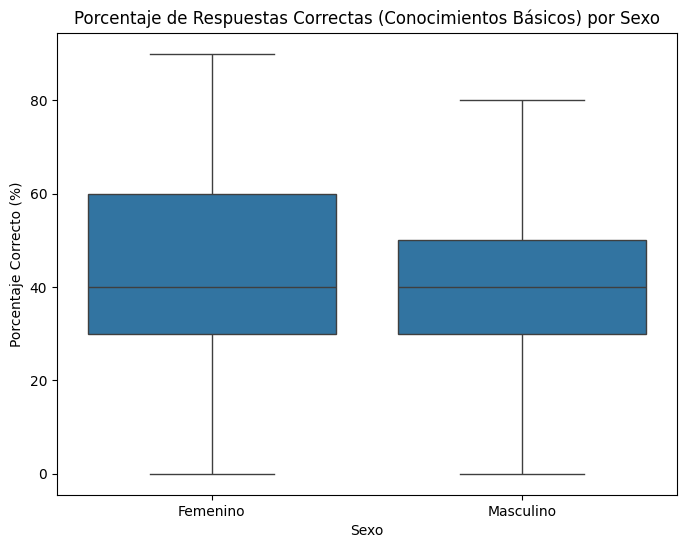

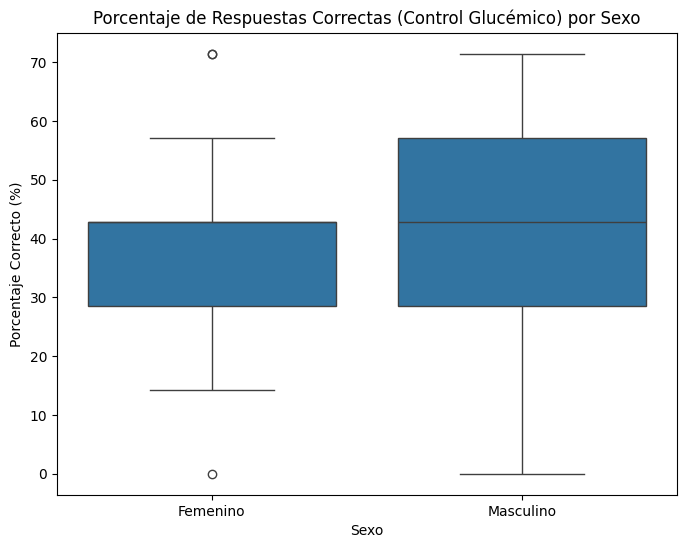

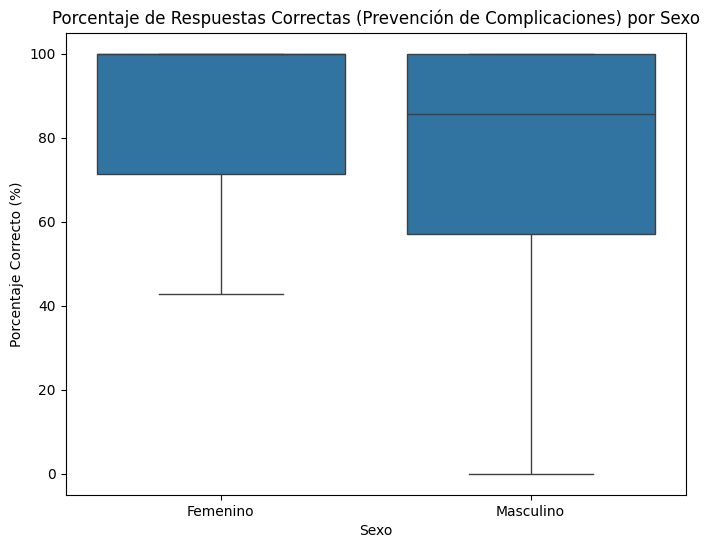

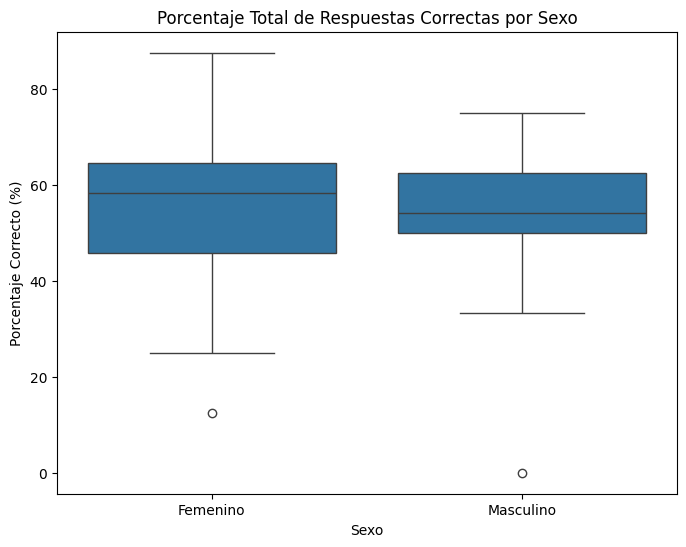

In [37]:
# Comparar sexo con porcentajes de respuestas correctas (4 puntajes), descriptiva, prueba estadística, gráfico

# ## Sexo y nivel de conocimiento
# Comparar sexo con porcentajes de respuestas correctas (4 puntajes), descriptiva, prueba estadística, gráfico

print("\nEstadística descriptiva de Sexo y Porcentajes de Respuestas Correctas:")
# Descriptiva para cada sexo
print("\nEstadística descriptiva por Sexo:")
print(df.groupby('Sexo')[['conocimientos_basicos_correctos', 'control_glucemico_correctos', 'prevencion_complicaciones_correctos', 'todas_respuestas_correctos']].describe())

# Prueba estadística: Prueba t de Student para comparar las medias de los dos grupos de sexo
print("\nPrueba t de Student para comparar Porcentajes de Respuestas Correctas por Sexo:")

# Filtrar los datos por sexo
hombres = df[df['Sexo'] == 'Masculino']
mujeres = df[df['Sexo'] == 'Femenino']

# Prueba t para Conocimientos Básicos
t_stat_basicos, p_value_basicos = stats.ttest_ind(hombres['conocimientos_basicos_correctos'], mujeres['conocimientos_basicos_correctos'], nan_policy='omit')
print(f"Sexo vs Conocimientos Básicos Correctos: Estadística t = {t_stat_basicos:.3f}, P-valor = {p_value_basicos:.3f}")

# Prueba t para Control Glucémico
t_stat_control, p_value_control = stats.ttest_ind(hombres['control_glucemico_correctos'], mujeres['control_glucemico_correctos'], nan_policy='omit')
print(f"Sexo vs Control Glucémico Correctos: Estadística t = {t_stat_control:.3f}, P-valor = {p_value_control:.3f}")

# Prueba t para Prevención de Complicaciones
t_stat_prevencion, p_value_prevencion = stats.ttest_ind(hombres['prevencion_complicaciones_correctos'], mujeres['prevencion_complicaciones_correctos'], nan_policy='omit')
print(f"Sexo vs Prevención de Complicaciones Correctos: Estadística t = {t_stat_prevencion:.3f}, P-valor = {p_value_prevencion:.3f}")

# Prueba t para Todas las Respuestas
t_stat_todas, p_value_todas = stats.ttest_ind(hombres['todas_respuestas_correctos'], mujeres['todas_respuestas_correctos'], nan_policy='omit')
print(f"Sexo vs Todas las Respuestas Correctas: Estadística t = {t_stat_todas:.3f}, P-valor = {p_value_todas:.3f}")


# Gráficos de cajas (box plots) o violines
print("\nGráficos de Caja de Porcentajes de Respuestas Correctas por Sexo:")

# Gráfico para Conocimientos Básicos
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Sexo', y='conocimientos_basicos_correctos')
plt.title('Porcentaje de Respuestas Correctas (Conocimientos Básicos) por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Porcentaje Correcto (%)')
plt.show()

# Gráfico para Control Glucémico
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Sexo', y='control_glucemico_correctos')
plt.title('Porcentaje de Respuestas Correctas (Control Glucémico) por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Porcentaje Correcto (%)')
plt.show()

# Gráfico para Prevención de Complicaciones
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Sexo', y='prevencion_complicaciones_correctos')
plt.title('Porcentaje de Respuestas Correctas (Prevención de Complicaciones) por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Porcentaje Correcto (%)')
plt.show()

# Gráfico para Todas las Respuestas
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Sexo', y='todas_respuestas_correctos')
plt.title('Porcentaje Total de Respuestas Correctas por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Porcentaje Correcto (%)')
plt.show()

## Nivel educativo y nivel de conocimiento


Estadística descriptiva de Nivel educativo y Porcentajes de Respuestas Correctas:

Estadística descriptiva por Nivel educativo:
                conocimientos_basicos_correctos                              \
                                          count       mean        std   min   
Nivel educativo                                                               
Primaria                                   37.0  43.513514  19.324167   0.0   
Secundaria                                  8.0  37.500000  13.887301  20.0   
Terciaria                                   3.0  63.333333  15.275252  50.0   

                                        control_glucemico_correctos  \
                  25%   50%   75%   max                       count   
Nivel educativo                                                       
Primaria         30.0  40.0  60.0  90.0                        37.0   
Secundaria       27.5  40.0  42.5  60.0                         8.0   
Terciaria        55.0  60.0  70.0  80.0  

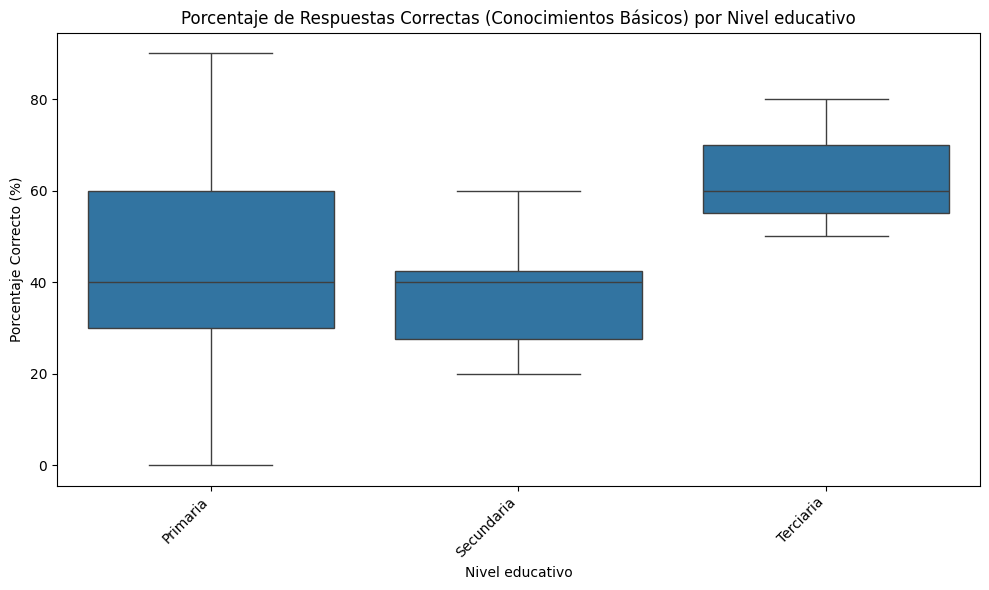

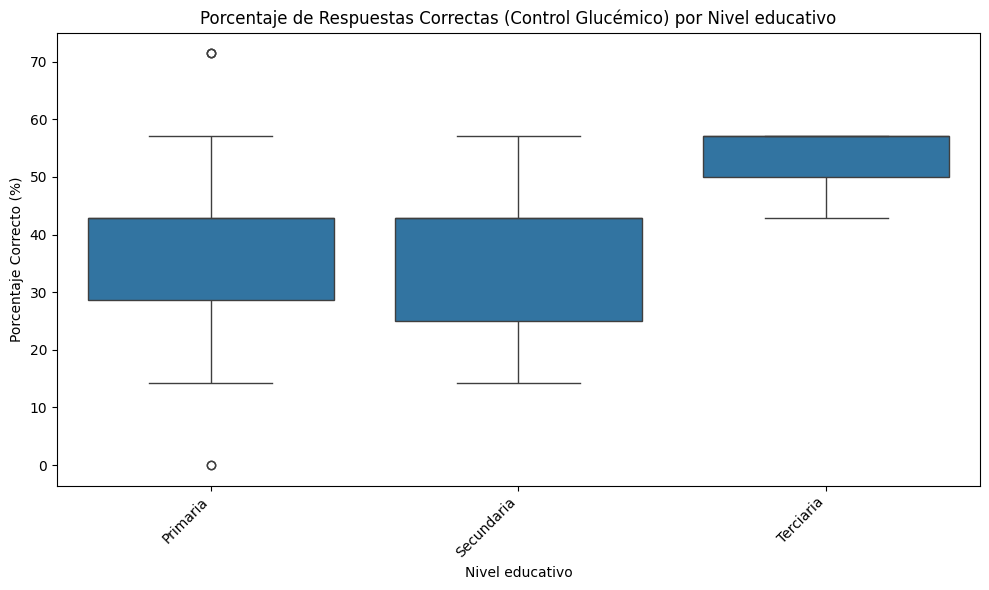

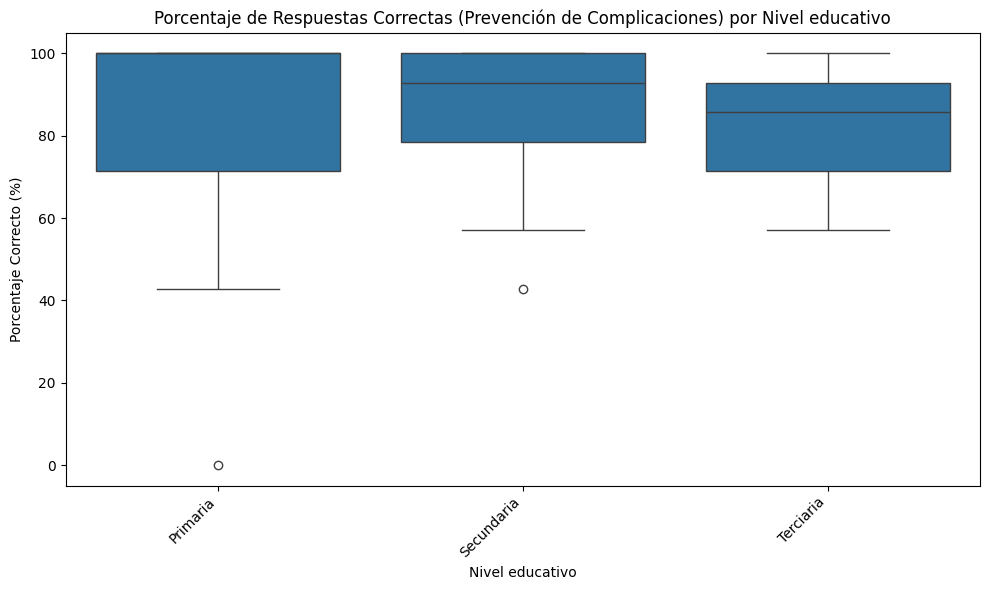

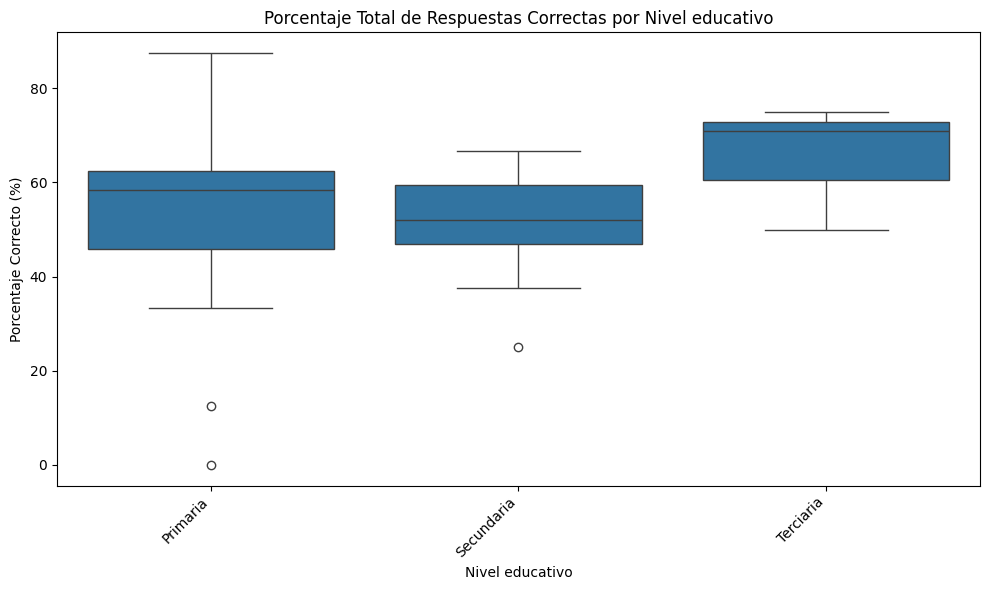

In [38]:
# prompt: Comparar nivel educativo con porcentajes de respuestas correctas (4 puntajes), descriptiva, prueba estadística, gráfico

# ## Nivel educativo y nivel de conocimiento
# Comparar nivel educativo con porcentajes de respuestas correctas (4 puntajes), descriptiva, prueba estadística, gráfico

print("\nEstadística descriptiva de Nivel educativo y Porcentajes de Respuestas Correctas:")
# Descriptiva para cada nivel educativo
print("\nEstadística descriptiva por Nivel educativo:")
print(df.groupby('Nivel educativo', observed=True)[['conocimientos_basicos_correctos', 'control_glucemico_correctos', 'prevencion_complicaciones_correctos', 'todas_respuestas_correctos']].describe())

# Prueba estadística: ANOVA para comparar las medias de los múltiples grupos de nivel educativo
print("\nPrueba ANOVA para comparar Porcentajes de Respuestas Correctas por Nivel educativo:")

# Realizar ANOVA para cada variable de porcentaje correcto
for col in ['conocimientos_basicos_correctos', 'control_glucemico_correctos', 'prevencion_complicaciones_correctos', 'todas_respuestas_correctos']:
  # Crear una lista de arrays, donde cada array contiene los datos de una categoría de nivel educativo
  groups = [group[col].dropna() for name, group in df.groupby('Nivel educativo', observed=True)]

  # Realizar la prueba ANOVA
  f_stat, p_value = stats.f_oneway(*groups)
  print(f"Nivel educativo vs {col}: Estadística F = {f_stat:.3f}, P-valor = {p_value:.3f}")

# Gráficos de cajas (box plots) o violines
print("\nGráficos de Caja de Porcentajes de Respuestas Correctas por Nivel educativo:")

# Gráfico para Conocimientos Básicos
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Nivel educativo', y='conocimientos_basicos_correctos')
plt.title('Porcentaje de Respuestas Correctas (Conocimientos Básicos) por Nivel educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Porcentaje Correcto (%)')
plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje x si son largas
plt.tight_layout() # Ajustar el diseño para evitar superposiciones
plt.show()

# Gráfico para Control Glucémico
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Nivel educativo', y='control_glucemico_correctos')
plt.title('Porcentaje de Respuestas Correctas (Control Glucémico) por Nivel educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Porcentaje Correcto (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráfico para Prevención de Complicaciones
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Nivel educativo', y='prevencion_complicaciones_correctos')
plt.title('Porcentaje de Respuestas Correctas (Prevención de Complicaciones) por Nivel educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Porcentaje Correcto (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráfico para Todas las Respuestas
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Nivel educativo', y='todas_respuestas_correctos')
plt.title('Porcentaje Total de Respuestas Correctas por Nivel educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Porcentaje Correcto (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()